In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def curva_ganancia(path: str):

    COSTO_ESTIMULO = 20000
    GANANCIA_ACIERTO = 780000

    df = pd.read_csv(path)

    # Ordenar por probabilidades descendentes
    df = df.sort_values("prob", ascending=False).reset_index(drop=True)

    # Ganancia por individuo
    df["ganancia_individual"] = np.where(
        df["y_true"] == 1,
        GANANCIA_ACIERTO,
        -COSTO_ESTIMULO
    )

    # Curva acumulada
    df["ganancia_acumulada"] = df["ganancia_individual"].cumsum()

    piso_envios = 4000
    techo_envios =20000

    segmento = df["ganancia_acumulada"].iloc[piso_envios:techo_envios]

    plt.figure(figsize=(12,6))
    plt.plot(range(piso_envios, techo_envios), segmento)
    plt.grid(True)
    plt.title("Curva de ganancia (segmento)")
    plt.xlabel("Top-k envíos")
    plt.ylabel("Ganancia acumulada")
    plt.show()

def detalles(path):
    df = pd.read_csv(path)

    # Ordenar por probabilidades descendentes
    df = df.sort_values("prob", ascending=False).reset_index(drop=True)

    # Ganancia por individuo
    df["ganancia_individual"] = np.where(
        df["y_true"] == 1,
        GANANCIA_ACIERTO,
        -COSTO_ESTIMULO
    )

    # Curva acumulada
    df["ganancia_acumulada"] = df["ganancia_individual"].cumsum()
    piso_envios = 4000
    techo_envios = 20000  # exclusivo

    gan_cum = df["ganancia_acumulada"].to_numpy()

    # segmento solo entre piso y techo
    curva_segmento = gan_cum[piso_envios:techo_envios]

    argmax_local = int(np.argmax(curva_segmento))
    k_mejor = int(piso_envios + argmax_local)      # igual que en tu función
    ganancia_max = float(curva_segmento[argmax_local])

    prob_umbral = float(df.loc[k_mejor - 1, "prob"])

    print("K óptimo (segmento):", k_mejor)
    print("Ganancia máxima segmento:", ganancia_max)
    print("Probabilidad umbral:", prob_umbral)


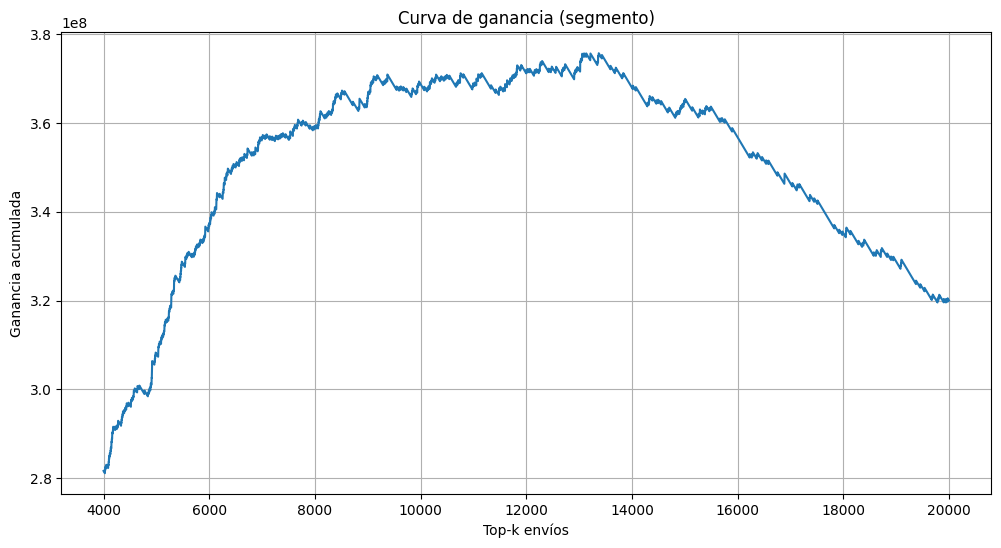

In [49]:
path = r"C:\Users\sopor\OneDrive\Documentos\Maestria\2_Cuatrimestre\DMEyF\competencia2\exp\apo-506_20251115_024932\predicciones_test2_detallado.csv"

curva_ganancia(path)

abril: Sin campos Visa y Master mfinanciamiento.


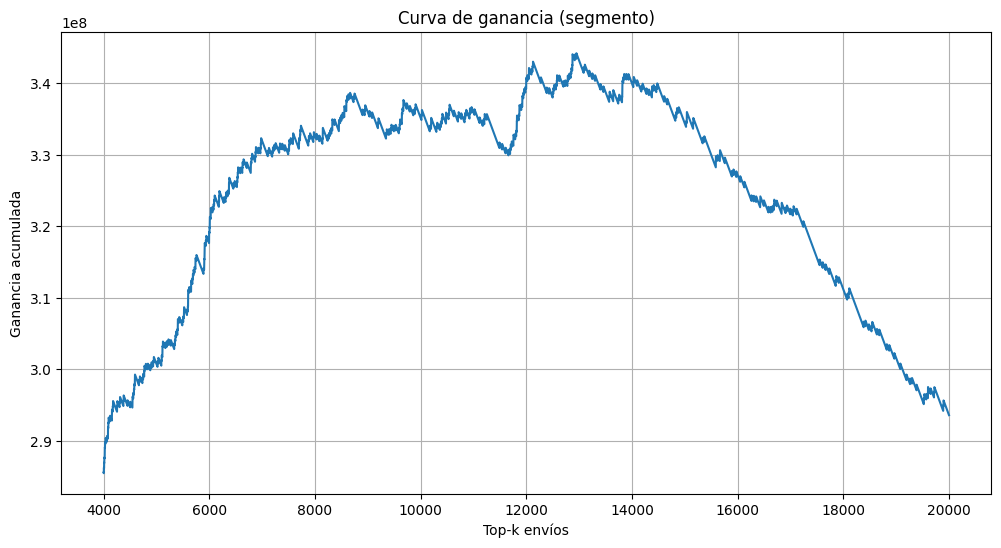

K óptimo (segmento): 12948
Ganancia máxima segmento: 344220000.0
Probabilidad umbral: 0.08686775658458
junio: Sin campos Visa y Master mfinanciamiento.


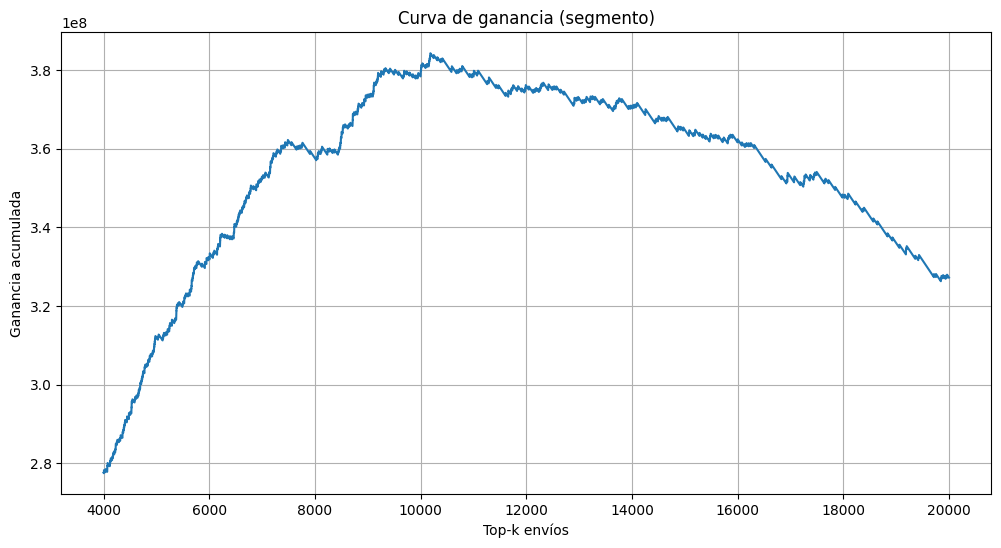

K óptimo (segmento): 10185
Ganancia máxima segmento: 384280000.0
Probabilidad umbral: 0.1045574133072213


In [50]:
# sin estacionalidad, sin visa master mfinanciamento
paths ={'abril':r'C:\Users\sopor\OneDrive\Documentos\Maestria\2_Cuatrimestre\DMEyF\competencia2\exp\apo-506_20251115_045042_sin_estacionalidad\predicciones_test1_detallado.csv',
        'junio': r'C:\Users\sopor\OneDrive\Documentos\Maestria\2_Cuatrimestre\DMEyF\competencia2\exp\apo-506_20251115_045042_sin_estacionalidad\predicciones_test2_detallado.csv'}
for mes, path in paths.items():
    print(f'{mes}: Sin campos Visa y Master mfinanciamiento.')
    curva_ganancia(path)
    detalles(path)

abril: CON campos Visa y Master mfinanciamiento.


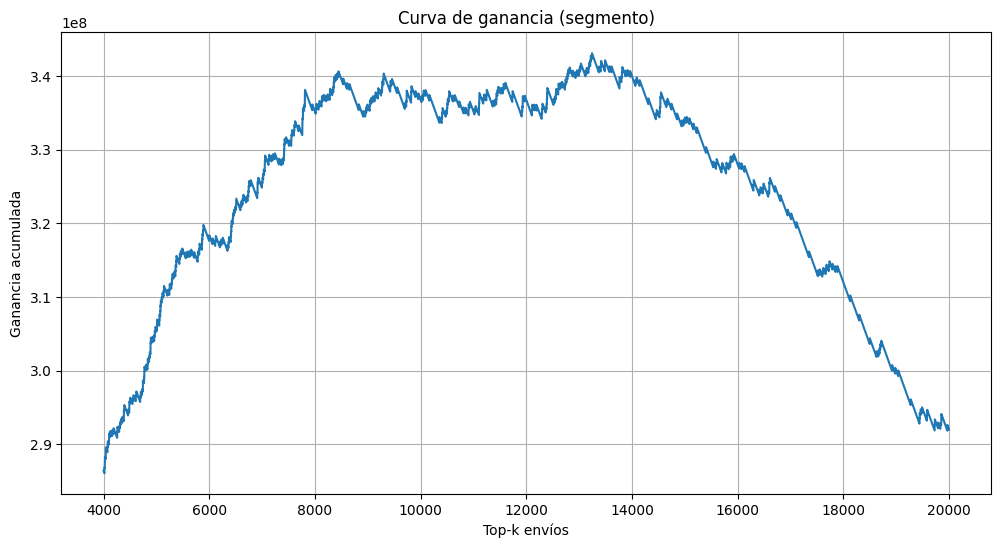

K óptimo (segmento): 13243
Ganancia máxima segmento: 343120000.0
Probabilidad umbral: 0.0852857139405198
junio: CON campos Visa y Master mfinanciamiento.


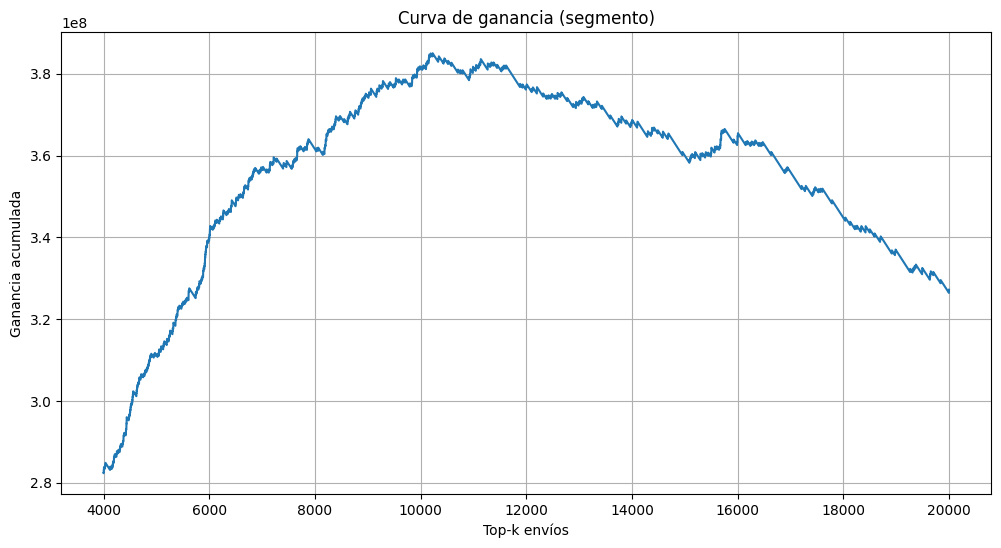

K óptimo (segmento): 10227
Ganancia máxima segmento: 385040000.0
Probabilidad umbral: 0.1034228932663071


In [51]:
# sin estacionalidad, sin visa master mfinanciamento
paths ={'abril':r'C:\Users\sopor\OneDrive\Documentos\Maestria\2_Cuatrimestre\DMEyF\competencia2\exp\apo-506_20251115_095708_sin_estacionalidad\predicciones_test1_detallado.csv',
        'junio': r'C:\Users\sopor\OneDrive\Documentos\Maestria\2_Cuatrimestre\DMEyF\competencia2\exp\apo-506_20251115_095708_sin_estacionalidad\predicciones_test2_detallado.csv'}
for mes, path in paths.items():
    print(f'{mes}: CON campos Visa y Master mfinanciamiento.')
    curva_ganancia(path)
    detalles(path)